<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Regression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression on Boston dataset
--------------------------------

here we will use the pipeline and gridsearchcv to get the results with less lines

In [0]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [0]:
#importing datasets
from sklearn.datasets import load_boston

loaded = load_boston()
loaded.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
#forming the dataframe of boston dataset
data = pd.DataFrame(loaded['data'],columns=loaded['feature_names'])
price_column = pd.Series(loaded['target'])
data['price'] = price_column
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
data.info()  # all are numerical and no categorical columns are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


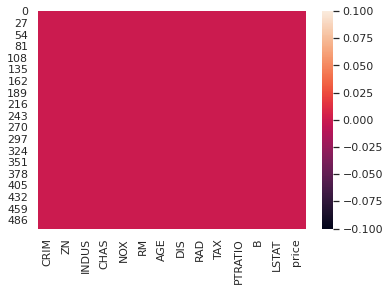

In [0]:
sns.heatmap(data.isna())  # no null values are there

In [0]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


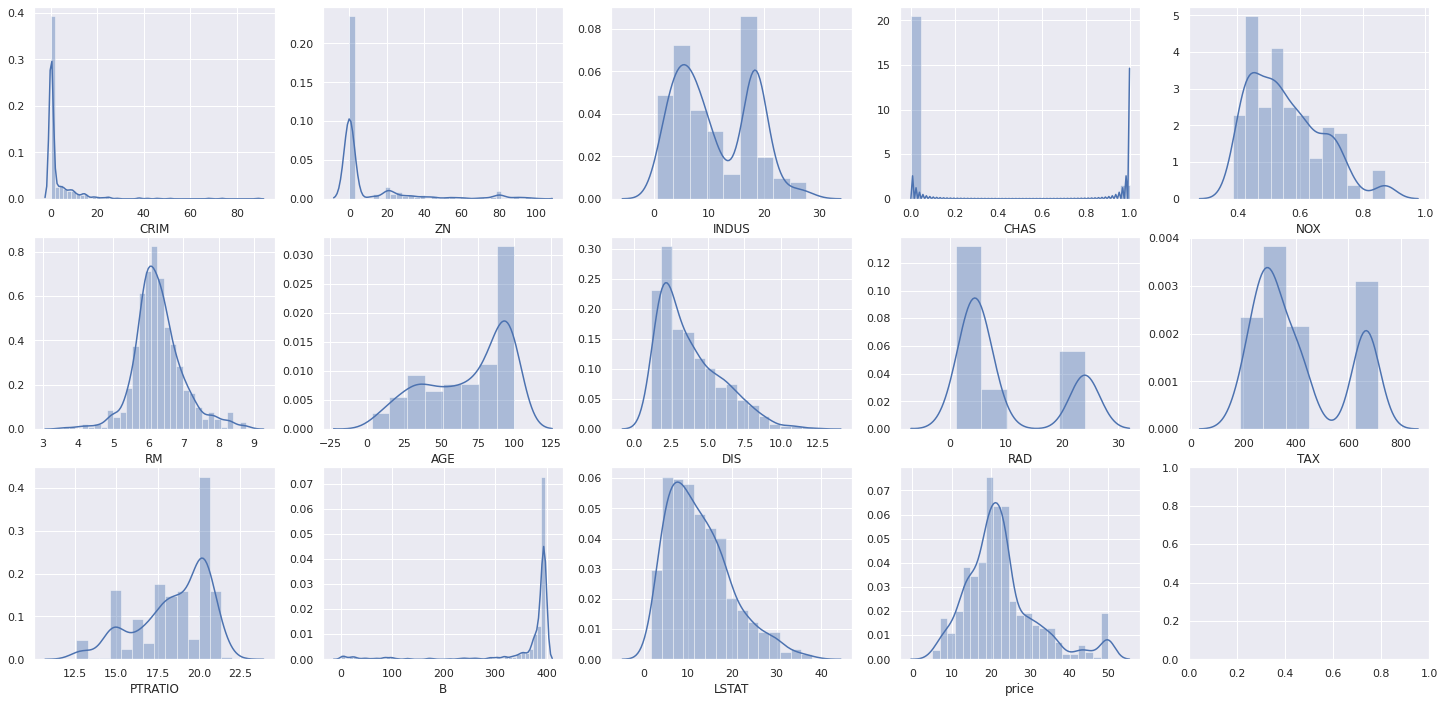

In [0]:
# visualizing the distributions
fg,arr=plt.subplots(3,5,figsize=(25,12))
i=1

for col in data.columns :
  plt.subplot(3,5,i)
  sns.distplot(data[col])
  i+=1

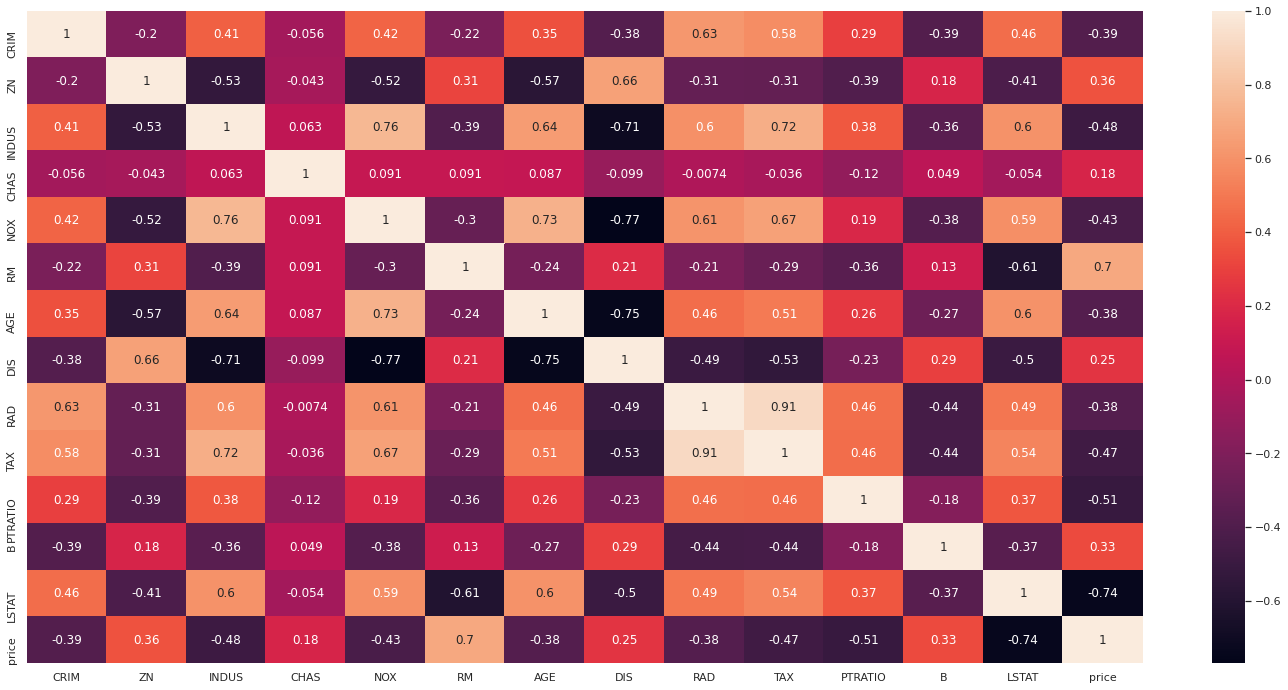

In [0]:
corr=data.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)

In [0]:
# from the corelation maxtrix i will do 2 things first
# model 1 : cosidering the all the features
# model 2 : considering 5 features : RM, ZN, B, DIS, CHAS 
# we will apply standardscaler for feature scaling
# both the models are linear model

new_x=data[['RM', 'ZN', 'B', 'DIS', 'CHAS']]
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
from sklearn.preprocessing import StandardScaler as SC
from sklearn.linear_model import LinearRegression as lr
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts

In [0]:
# making a pipeline

pipe = Pipeline(steps=[ ('scaler', SC() ),
                        ('linear_regression', lr(fit_intercept=True) )
                       ])

In [0]:
# splitting the data for traininf and testing for model 1 [all the features]
x_train1,x_test1,y_train1,y_test1 = tts(x,y,random_state=42,test_size=0.3)

# splitting the data for traininf and testing for model 2 [only 5  features]
x_train2,x_test2,y_train2,y_test2 = tts(new_x,y,random_state=42,test_size=0.3)

In [0]:
# training the data
# model 1
pipe.fit(x_train1,y_train1)
pred = pipe.predict(x_test1)

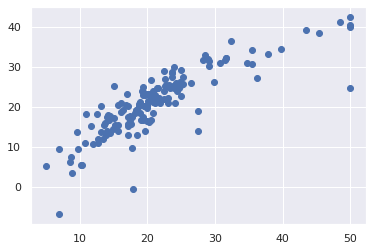

In [0]:
#checking the res for model 1
plt.scatter(y_test1,pred)

In [0]:
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
mean_squared_error(y_test1,pred), r2_score(y_test1,pred)

(21.517444231177212, 0.7112260057484932)

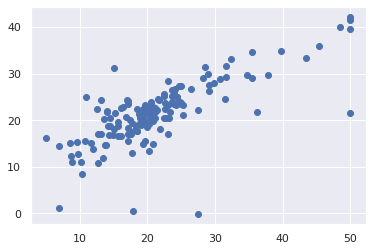

In [0]:
# for model 2
pipe.fit(x_train2,y_train2)
pred = pipe.predict(x_test2)

#checking the res for model 2
plt.scatter(y_test2,pred)

In [0]:
mean_squared_error(y_test2,pred), r2_score(y_test2,pred) # mse is increased and r2_score is decreased  : pretty bad  for model 2

(32.7811548632749, 0.5600618305621512)

## Ridge Regression and gridsearchcv

In [0]:
alpha=np.append( [0.1,0.001,0.01,0.0001] , np.linspace(1,20,30)) 

In [0]:
  from sklearn.model_selection import GridSearchCV as gsc
  from sklearn.linear_model import Ridge
  from sklearn.pipeline import make_pipeline
 # from sklearn.metrics import neg

In [0]:
pipe=make_pipeline(SC(),Ridge())
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [0]:
pipe.get_params() # all the param list

{'memory': None,
 'ridge': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
         normalize=False, random_state=None, solver='auto', tol=0.001))],
 'verbose': False}

In [0]:
model3=gsc(pipe,param_grid={'ridge__alpha':alpha},cv=10,scoring='neg_mean_squared_error')
model3.fit(x_train1,y_train1)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ridge__alpha': a...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 

In [0]:
model3.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=12.137931034482758, copy_X=True,
                       fit_intercept=True, max_iter=None, normalize=False,
                       random_state=None, solver='auto', tol=0.001))],
         verbose=False)

In [0]:
model3.best_params_,model3.best_score_

({'ridge__alpha': 12.137931034482758}, -25.416975633371752)

In [0]:
pred=model3.predict(x_test1)

In [0]:
mean_squared_error(y_test1,pred), r2_score(y_test1,pred)   # 71% accuracy

(21.867511842042248, 0.7065279374667078)

### with model 2 : ridgecv and gridserachcv

In [0]:
pipe=make_pipeline(SC(),Ridge())
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [0]:
model4=gsc(pipe,param_grid={'ridge__alpha':alpha},cv=10,scoring='neg_mean_squared_error')
model4.fit(x_train2,y_train2)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ridge__alpha': a...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 

In [0]:
model4.best_params_,model4.best_score_

({'ridge__alpha': 13.448275862068964}, -39.8795389318739)

In [0]:
pred=model4.predict(x_test2)

In [0]:
mean_squared_error(y_test2,pred), r2_score(y_test2,pred)   # 71% accuracy

(32.77543434187914, 0.5601386025892985)

## using ridgecv

In [0]:
from sklearn.linear_model import RidgeCV as rc

In [0]:
pipe=make_pipeline(SC(),rc(alphas=alpha,scoring='neg_mean_squared_error'))
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.24137931e+00, 6.89655172e+00, 7.551...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                         store_cv_values=False))],
         verbose=False)

In [0]:
pipe.fit(x_train1,y_train1)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.24137931e+00, 6.89655172e+00, 7.551...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                         store_cv_values=False))],
         verbose=False)

In [0]:
pipe['ridgecv'].alpha_   # Best Alpha

7.551724137931034

In [0]:
pred=pipe.predict(x_test1)

In [0]:
mean_squared_error(y_test1,pred), r2_score(y_test1,pred)

(21.74392427377481, 0.70818653945238)

### Bringing Polynomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [0]:
pipe=make_pipeline( SC(),
                   pf(degree=2,include_bias=False),
                   rc(alphas=alpha,scoring='neg_mean_squared_error') 
                  )
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.9655...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                       

In [0]:
pipe.fit(x_train1,y_train1)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.9655...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                       

In [0]:
pipe['ridgecv'].alpha_ 

12.793103448275861

In [0]:
pred=pipe.predict(x_test1)

In [0]:
mean_squared_error(y_test1,pred), r2_score(y_test1,pred)

(14.216293712688767, 0.8092108024187443)

## with model2 : standardscalerr, polynomialfeatures and Ridgecv

In [0]:
pipe=make_pipeline( SC(),
                   pf(degree=3,include_bias=False),
                   rc(alphas=alpha,scoring='neg_mean_squared_error') 
                  )
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.9655...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                       

In [0]:
pipe.fit(x_train2,y_train2)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.9655...
       8.86206897e+00, 9.51724138e+00, 1.01724138e+01, 1.08275862e+01,
       1.14827586e+01, 1.21379310e+01, 1.27931034e+01, 1.34482759e+01,
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring='neg_mean_squared_error',
                       

In [0]:
pipe['ridgecv'].alpha_ 

20.0

In [0]:
pred=pipe.predict(x_test2)

In [0]:
mean_squared_error(y_test2,pred), r2_score(y_test2,pred)

(30.089473634149055, 0.5961854301604829)

# LAssocv

In [0]:
from sklearn.linear_model import LassoCV as lc

In [0]:
pipe=make_pipeline(SC(),lc(alphas=alpha,cv=10,random_state=42))
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.24137931e+00, 6.89655172e+00, 7.551...
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         copy_X=True, cv=10, eps=0.001, fit_intercept=True,
                         max_iter=1000, n_alphas=100, n_jobs=None,
                         normalize=False, positive=False, precompute='auto',
                         random_state=42, selection='cyclic', tol=0.0001,
                         verbose=False))],
         verbose=False)

In [0]:
pipe.fit(x_train1,y_train1)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.96551724e+00,
       3.62068966e+00, 4.27586207e+00, 4.93103448e+00, 5.58620690e+00,
       6.24137931e+00, 6.89655172e+00, 7.551...
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         copy_X=True, cv=10, eps=0.001, fit_intercept=True,
                         max_iter=1000, n_alphas=100, n_jobs=None,
                         normalize=False, positive=False, precompute='auto',
                         random_state=42, selection='cyclic', tol=0.0001,
                         verbose=False))],
         verbose=False)

In [0]:
pipe['lassocv'].alpha_   # Best Alpha

0.0001

In [0]:
pred=pipe.predict(x_test1)

In [0]:
mean_squared_error(y_test1,pred), r2_score(y_test1,pred)

(21.517846885539132, 0.7112206019418355)

## lassocv and polynomial

In [0]:
pipe=make_pipeline( SC(),
                   pf(degree=3,include_bias=False),
                   lc(alphas=alpha,cv=10,random_state=42,max_iter=10000,tol=0.0001)
                  )
pipe

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lassocv',
                 LassoCV(alphas=array([1.00000000e-01, 1.00000000e-03, 1.00000000e-02, 1.00000000e-04,
       1.00000000e+00, 1.65517241e+00, 2.31034483e+00, 2.9655...
       1.41034483e+01, 1.47586207e+01, 1.54137931e+01, 1.60689655e+01,
       1.67241379e+01, 1.73793103e+01, 1.80344828e+01, 1.86896552e+01,
       1.93448276e+01, 2.00000000e+01]),
                         copy_X=True, cv=10, eps=0.001, fit_intercept=True,
                         max_iter=1000000000, n_alphas=100, n_jobs=None,
                         normalize=False, positive=False, precompute='auto',
                         random_state=42, selection='cyclic', tol=0.0001,
          

In [0]:
pipe.fit(x_train1,y_train1)